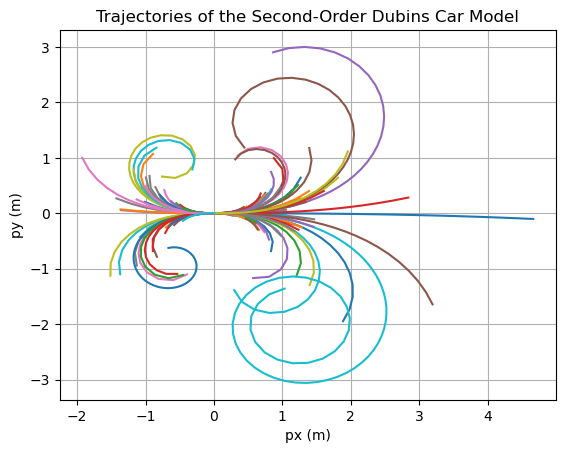

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 0.5  # Distance between wheel axles (m)
dt = 0.05  # Time step (s)
num_trajectories = 150
trajectory_length = 10  # seconds

# Control constraints
a_min = -10  # m/s^2
a_max = 10   # m/s^2
psi_dot_min = -3   # rad/s
psi_dot_max = 3    # rad/s

# State constraints
v_min = -5  # m/s
v_max = 5   # m/s
phi_min = -np.pi / 3  # rad
phi_max = np.pi / 3   # rad

# Define the initial state
x_init = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
# x = [px, py, theta, v, phi]


# Simulate trajectories
for _ in range(num_trajectories):
    # Initialize arrays to store trajectories
    px_traj = []
    py_traj = []
    x =  x_init.copy()
    px_traj.append(x[0])
    py_traj.append(x[1])
    # Sample controls uniformly from their range
    a = np.random.uniform(a_min, a_max)
    psi_dot = np.random.uniform(psi_dot_min, psi_dot_max)
    # print("a:", a, ", psi: ", psi_dot)

    for _ in range(int(trajectory_length / dt)):
        # Euler integration to update state
        x[3] += a * dt
        x[4] += psi_dot * dt
        x[0] += x[3] * np.cos(x[2]) * dt
        x[1] += x[3] * np.sin(x[2]) * dt
        x[2] += x[3] * np.tan(x[4]) * dt / L
        
        # Check state constraints
        if x[3] < v_min or x[3] > v_max or x[4] < phi_min or x[4] > phi_max:
            break
        
        px_traj.append(x[0])
        py_traj.append(x[1])

    plt.plot(px_traj, py_traj)
# Plot the trajectories
# plt.figure(figsize=(8, 6))
plt.xlabel('px (m)')
plt.ylabel('py (m)')
plt.title('Trajectories of the Second-Order Dubins Car Model')
plt.grid(True)
plt.show()


[0.0, -0.018323870363521715, -0.06088140050290815, -0.1276213388994382, -0.21233933210535536, -0.3037522278495366, -0.3882880610098133, -0.45461438438673984, -0.4974481189590556, -0.5178674400890725, -0.5212422153183232, -0.5156344753538098, -0.5108025544541571, -0.5163989109448434, -0.5394828170439175, -0.582835251903594, -0.6449504224813678, -0.7209258878979633, -0.8028770273424113, -0.8801899509404337, -0.9416937512655453, -0.980030137038324, -0.9949238126888253, -0.9928971779580854, -0.9848377802138922, -0.9831157300197968, -0.9985464918731031, -1.0377520357624446, -1.1013977680214393, -1.1837901080533055, -1.274551289882788, -1.3617421668510987, -1.4347133517892836, -1.4860814542028085, -1.5133004969928576, -1.5196211460105558, -1.513587722107492, -1.5069023782642466, -1.5113943492587207, -1.536174581983685, -1.5856903462961833, -1.6585328840783782, -1.747161145205312, -1.839673683523115, -1.9234492496592384, -1.9885574466851577, -2.029710268179724, -2.0471736783840524, -2.0468382

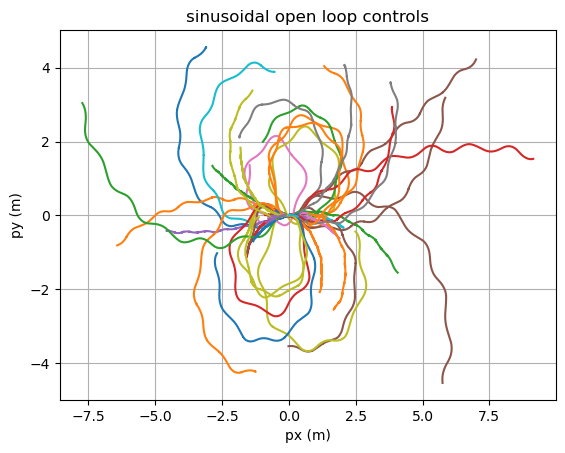

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 0.5  # Distance between wheel axles (m)
dt = 0.05  # Time step (s)
num_trajectories = 150
trajectory_length = 10  # seconds

# Control constraints
a_min = -10  # m/s^2
a_max = 10   # m/s^2
psi_dot_min = -3   # rad/s
psi_dot_max = 3    # rad/s

# State constraints
v_min = -5  # m/s
v_max = 5   # m/s
phi_min = -np.pi / 3  # rad
phi_max = np.pi / 3   # rad

# Define the initial state
x_init = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
# x = [px, py, theta, v, phi]


# Simulate trajectories
for _ in range(num_trajectories):
    # Initialize arrays to store trajectories
    px_traj = []
    py_traj = []
    x =  x_init.copy()
    px_traj.append(x[0])
    py_traj.append(x[1])
    # Sample controls uniformly from their range
    c = np.random.uniform(0, 2*np.pi)
    d = np.random.uniform(0, 2*np.pi)

    # print("a:", a, ", psi: ", psi_dot)

    for i in range(int(trajectory_length / dt)):
        # Euler integration to update state
        a = 10*np.sin(10*i*dt + c)
        psi_dot = 3*np.sin(4*i*dt + d)
        x[3] += a * dt
        x[4] += psi_dot * dt
        x[0] += x[3] * np.cos(x[2]) * dt
        x[1] += x[3] * np.sin(x[2]) * dt
        x[2] += x[3] * np.tan(x[4]) * dt / L
        
        # Check state constraints
        if x[3] < v_min or x[3] > v_max or x[4] < phi_min or x[4] > phi_max:
            break
        
        px_traj.append(x[0])
        py_traj.append(x[1])
    print(px_traj)
    plt.plot(px_traj, py_traj)
# Plot the trajectories
# plt.figure(figsize=(8, 6))
plt.xlabel('px (m)')
plt.ylabel('py (m)')
plt.title('sinusoidal open loop controls')
plt.grid(True)
plt.show()


![Alt text](image.png)

In [188]:
import math
def Sample():
    px = np.random.uniform(-10, 10)
    py = np.random.uniform(-10, 10)
    # print("x,y:",px,py)
    theta = np.random.uniform(0, 2*np.pi)
    v = np.random.uniform(-5, 5)
    phi = np.random.uniform(-np.pi/3, np.pi/3)
    return [px, py, theta, v, phi]

def dso2(th1, th2):
    if th2-th1 > np.pi:
        return np.abs(th2-th1-2*np.pi)
    elif th2-th1 <= -np.pi:
        return np.abs(th2-th1+2*np.pi)
    else:
        return np.abs(th2-th1)

def Nearest(T, y):
    w_x=0.01
    w_y=0.01
    w_theta=0.01
    w_v=1
    w_phi=0.01
    min_d= float("inf")
    min_x = y
    # iterate the tree T, for each x: //TODO
    for x in T:
        dxy = np.sqrt(w_x*((x[0]-y[0])**2) + w_y*((x[1]-y[1])**2) + w_theta*(dso2(x[2], y[2])**2)  + w_v*((x[3]-y[3])**2) + w_phi*((x[4]-y[4])**2))
        if dxy < min_d:
            min_d = dxy
            min_x = x
    return min_x
        
def ChooseControl(x_near, x_rand):
    a_min = -10  # m/s^2
    a_max = 10   # m/s^2
    psi_dot_min = -3   # rad/s
    psi_dot_max = 3    # rad/s
    a = np.random.uniform(a_min, a_max)
    psi = np.random.uniform(psi_dot_min, psi_dot_max)
    return [a,psi]

In [189]:
def Simulate(x_near, u_e, dt):
    # Parameters
    L = 0.5  # Distance between wheel axles (m)
    num_trajectories = 150
    trajectory_length = 10  # seconds

    # Control constraints
    a_min = -10  # m/s^2
    a_max = 10   # m/s^2
    psi_dot_min = -3   # rad/s
    psi_dot_max = 3    # rad/s

    # State constraints
    v_min = -5  # m/s
    v_max = 5   # m/s
    phi_min = -np.pi / 3  # rad
    phi_max = np.pi / 3   # rad

    # Define the initial state
    x = np.copy(x_near)
    # x = [px, py, theta, v, phi]


    # Simulate trajectories
    
    # Euler integration to update state
    a = u_e[0]
    psi_dot = u_e[1]
    # print("a, psi:",a,psi_dot)
    # for _ in range(int(trajectory_length / dt)):
        # Euler integration to update state
    x[3] += a * dt
    x[4] += psi_dot * dt
    # if x[3] < v_min or x[3] > v_max or x[4] < phi_min or x[4] > phi_max:
    #     break
    x[0] += x[3] * np.cos(x[2]) * dt
    x[1] += x[3] * np.sin(x[2]) * dt
    x[2] += x[3] * np.tan(x[4]) * dt / L

    return x
        
        # Check state constraints
        # if x[3] < v_min or x[3] > v_max or x[4] < phi_min or x[4] > phi_max:
        #     break
        

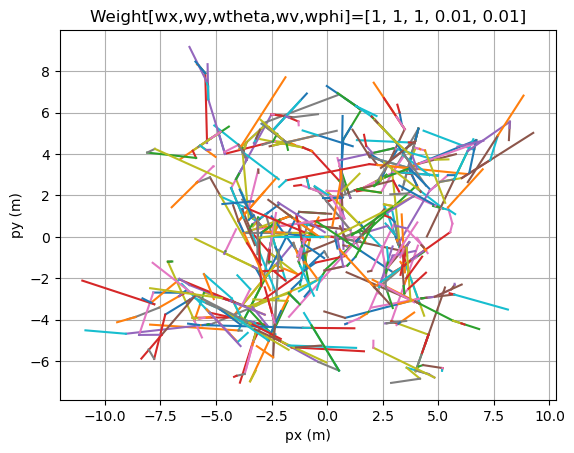

In [190]:
# Rapidly-Exploring Random Trees
# State constraints
v_min = -5  # m/s
v_max = 5   # m/s
phi_min = -np.pi / 3  # rad
phi_max = np.pi / 3   # rad
# Define the initial state
x_init = np.array([0.0, 0.0, 0.0, 0.0, 0.0])


# put x0 into tree T
T=[]
T.append(x_init)
N =1000
i=0
while i < N:
    x_rand = Sample()
    # print("x_rand:", x_rand)

    # find the node in T that is nearest to x_rand
    x_near = Nearest(T, x_rand) 
    # print("x_near:", x_near)
    # ??
    u_e = ChooseControl(x_near, x_rand)
    dt = np.random.uniform(0,1)
    x_e = Simulate(x_near, u_e, dt)
    # print("dt:", dt)

    # Check state constraints
    if x_e[3] < v_min or x_e[3] > v_max or x_e[4] < phi_min or x_e[4] > phi_max:
        continue

    T.append(x_e)
    # add edge x_near -> x_e to T
    # print(x_near[0],x_near[1],x_e[0],x_e[1])
    plt.plot([x_near[0],x_e[0]], [x_near[1],x_e[1]])
  
    i+=1

# Plot the trajectories
# plt.figure(figsize=(8, 6))
plt.xlabel('px (m)')
plt.ylabel('py (m)')
plt.title('Weight[wx,wy,wtheta,wv,wphi]=[1, 1, 1, 0.01, 0.01]')
plt.grid(True)
plt.show()
